# Shopping Spending Score Project- USL

* Increasing sales and hence making huge profits, by identifying and targeting the right set of customers.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PowerTransformer
demo = pd.read_csv("shopping_data.csv")
demo= demo.drop('CustomerID',axis=1)
demo= demo.drop('Genre',axis=1)
demo= demo.drop('Age',axis=1)
feature_names = demo.columns
demo.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Missing Value 

In [2]:
demo.isnull().sum()

# We can observe that there are no missing values in the dataset

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Scaling and Transforming the Dataset in order to get appropriate Clsuters

In [3]:
pt= PowerTransformer()
sc= StandardScaler()
pt_df= pt.fit_transform(demo)
sc_pt_df= sc.fit_transform(pt_df)
sc_df= pd.DataFrame(sc_pt_df,columns= feature_names)

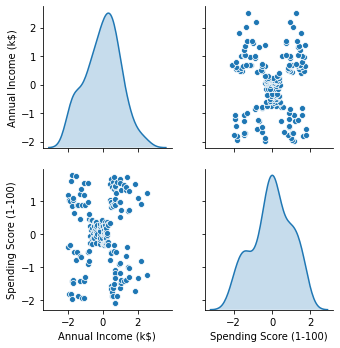

In [4]:
sns.pairplot(sc_df,diag_kind='kde')
plt.show()

#### Observation

* From above pairplot we can observe 5 clusters roughly. With the help of K-Means, Silhoute, Agglomerative Clustering will further explore these clusters

### K-means Implementation

A common challenge with k-means is that you must tell it how many clusters you expect. Figuring out how many clusters we need is not obvious from data, thus we will try different clusters numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). The [elbow](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_elbow_method) method can be used to determine the number of clusters as well.

**Note:** K-means is sensitive to initializations because those initializations are critical to quality of optima found. Thus, we will use smart initialization called ***k-means++***.

In [5]:
from sklearn.cluster import KMeans 

In [6]:
cluster_range= range(1,15)
wcss= []
for num_clusters in cluster_range:
    clusters= KMeans(num_clusters,n_init=15,random_state=20)
    clusters.fit(sc_df)
    labels= clusters.labels_
    centroids= clusters.cluster_centers_
    wcss.append(clusters.inertia_)
cluster_df= pd.DataFrame({"num_clusters":cluster_range,"wcss":wcss})

In [7]:
cluster_df

,num_clusters,wcss
0,1,400.000000
1,2,266.892051
2,3,164.131751
3,4,108.743952
4,5,61.264301
5,6,52.291802
6,7,44.897892
7,8,37.644076
8,9,31.934359
9,10,28.260774


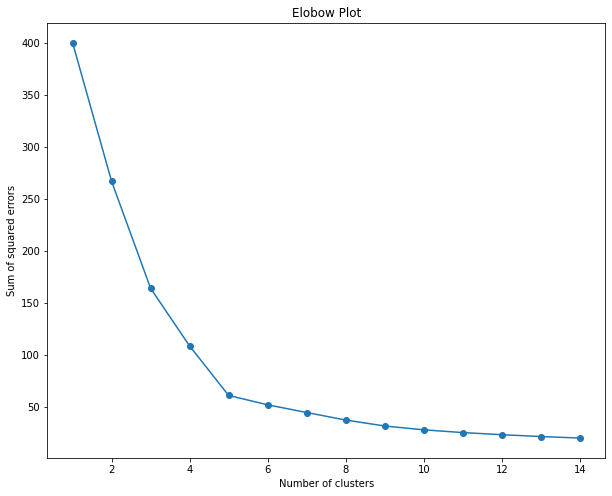

In [8]:
## Elbow Method
plt.figure(figsize=[10,8])
plt.plot(cluster_df.num_clusters,cluster_df.wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")
plt.title("Elobow Plot")
plt.show()

#### Observation: 

* Total Sum of Squared distances of every data point from respective centeroid is also known as Inertia.From above we can observe that at k=5 inertia stop to drop significantly. Thus we ll be chossing k, number of clusters as 5


In [9]:
kmeans= KMeans(n_clusters=5,n_init=100,init="k-means++",random_state=20)
kmeans= kmeans.fit(sc_df)
labels= kmeans.predict(sc_df)
centroids= kmeans.cluster_centers_
pd.DataFrame(centroids,columns= sc_df.columns)



,Annual Income (k$),Spending Score (1-100)
0,1.027441,-1.313313
1,-0.146443,0.004539
2,0.972655,1.201162
3,-1.450228,-1.215721
4,-1.422019,1.103365


In [10]:
colnames= sc_df.columns
prediction= kmeans.predict(sc_df)
k_df= sc_df.copy(deep= True)


In [11]:
k_df["group"]= prediction

In [12]:
k_df["group"].value_counts()

1    83
2    39
0    35
4    22
3    21
Name: group, dtype: int64

In [13]:
k_df

,Annual Income (k$),Spending Score (1-100),group
0,-1.989930,-0.385308,3
1,-1.989930,1.164467,4
2,-1.930366,-1.820424,3
3,-1.930366,1.023549,4
4,-1.872032,-0.346103,3
...,...,...,...
195,2.027774,1.094146,2
196,2.202670,-0.827902,0
197,2.202670,0.917116,2
198,2.515898,-1.254103,0


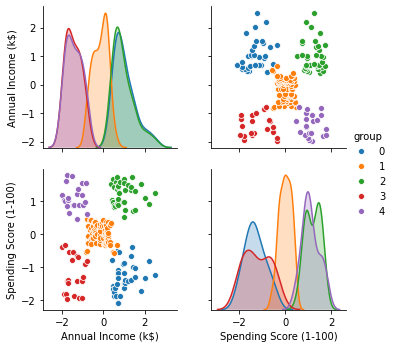

In [14]:
sns.pairplot(k_df,diag_kind='kde',hue='group',vars= k_df.iloc[:,0:2])

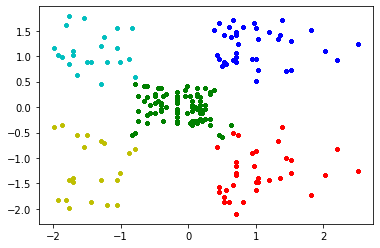

In [15]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(k_df.loc[k_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


## Silhoute Coffecient

* Silhoute coffecient is another strategy to find optimal number of clusters. the formula for silhoute is:(B-A)/max(B,A). where B is the avg distance of the points from all points in the nearest clster, and  is avg distance of points from all points in same cluster. the value ranges from -1 to 1. Higher the value,better is number of clusters.

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X= sc_df.values
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
        clusterer= KMeans(n_clusters= n_clusters, random_state=20)
        cluster_labels= clusterer.fit_predict(X)
        silhoutte_avg= silhouette_score(X,cluster_labels)
        print("For n_clusters=",n_clusters,
              "the average silhoute_score is:",silhoutte_avg)
        sample_silhoutte_values= silhouette_samples(X,cluster_labels)

Automatically created module for IPython interactive environment
For n_clusters= 2 the average silhoute_score is: 0.30524134048730794
For n_clusters= 3 the average silhoute_score is: 0.44897807908557874
For n_clusters= 4 the average silhoute_score is: 0.4983534404730385
For n_clusters= 5 the average silhoute_score is: 0.5616851363040973
For n_clusters= 6 the average silhoute_score is: 0.46319077657680197


#### Observation:

* For silhoute the avg score is highest at cluster 5. Thus we can say that even from silhoute coffecient method we are getting 5 clsuters for the Shopping Spending Dataset.

## Agglomerative Hierarchical Clustering:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

* In the agglomerative hierarchical approach, we define each data point as a cluster and combine existing clusters at each step. Below are five different methods for this approach:



- Single Linkage: In single linkage, we define the distance between two clusters as the minimum distance between any single data point in the first cluster and any single data point in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters with the smallest single linkage distance.

* Complete Linkage: In complete linkage, we define the distance between two clusters to be the maximum distance between any single data point in the first cluster and any single data point in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters that have the smallestcomplete linkage distance.

* Average Linkage: In average linkage, we define the distance between two clusters to be the average distance between data points in the first cluster and data points in the second cluster. On the basis of this definition of distance between clusters, at each stage of the process we combine the two clusters that have the smallest average linkage distance.

* Centroid Method: In centroid method, the distance between two clusters is the distance between the two mean vectors of the clusters. At each stage of the process we combine the two clusters that have the smallest centroid distance.

* Ward’s Method: This method does not directly define a measure of distance between two points or clusters. It is an ANOVA based approach. One-way univariate ANOVAs are done for each variable with groups defined by the clusters at that stage of the process. At each stage, two clusters merge that provide the smallest increase in the combined error sum of squares.

##### Trying with different Linkage Methods. Cophenet distance correlation Coffecient helps in deciding which linkage method should be beneficial for the dataset. The higher the coffecient, better it is

In [17]:
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist



merg1= linkage(sc_df,method="single")
c,cophenet_dist= cophenet(merg1,pdist(sc_df))
print(c)

0.7097521918258911


In [18]:
merg2= linkage(sc_df,method="complete")
c,cophenet_dist= cophenet(merg2,pdist(sc_df))
print(c)

0.5920898160926994


In [19]:
merg3= linkage(sc_df,method="average")
c,cophenet_dist= cophenet(merg3,pdist(sc_df))
print(c)

0.7294666127756255


In [20]:
merg4= linkage(sc_df,method="ward")
c,cophenet_dist= cophenet(merg4,pdist(sc_df))
print(c)

0.7150016894896991


In [21]:
merg5= linkage(sc_df,method="centroid")
c,cophenet_dist= cophenet(merg5,pdist(sc_df))
print(c)

0.7264970394370702


* From above we can observe that "Average Linkage Method" gives the highest cophent distance

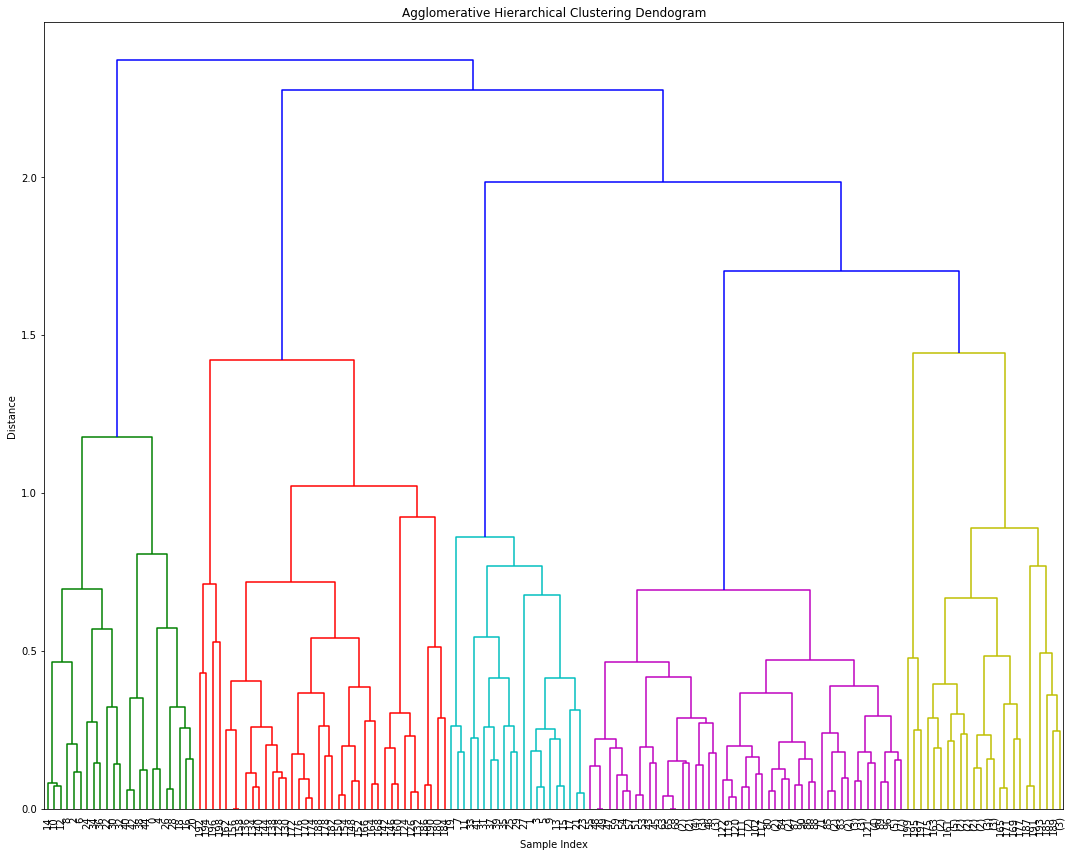

In [22]:
plt.figure(figsize=[15,12])
plt.title("Agglomerative Hierarchical Clustering Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(merg3,leaf_rotation=90,p=9,leaf_font_size=10,truncate_mode="level")
plt.tight_layout()

In [23]:
# Number of clsuters= 5. Building model using Agglomerative :

from sklearn.cluster import AgglomerativeClustering

model= AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")
model.fit(sc_df)
model.fit_predict(sc_df)

h_df= sc_df.copy(deep= True)
h_df["group"]= model.fit_predict(sc_df)

In [24]:
h_df["group"].value_counts()

4    79
0    39
2    38
1    23
3    21
Name: group, dtype: int64

#### Conclusion:

* From all the three methods of clustering which are:
    - K-Means Clustering
    - Silhoutte Coffecient
    - Agglomerative Clustering

- The optimal number of clusters obtained are five. Thus it can be conclude clearly that there are 5 different set of customers
based on the two most important features which are "Annual Income" & "Spending Score"


#### Lets further understand these 5 clusters obtained from both K-Means and Agglomerative Clustering using a boxplot

###  Clusters obtained from K-Means Clsutering

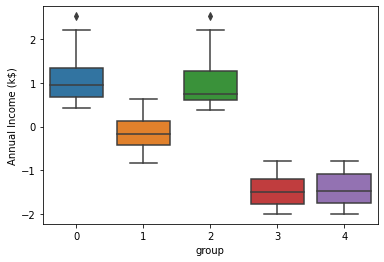

In [25]:
sns.boxplot(x='group',y='Annual Income (k$)',data=k_df)
plt.show()

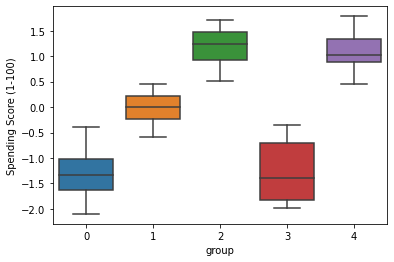

In [26]:
sns.boxplot(x='group',y='Spending Score (1-100)',data=k_df)
plt.show()

#### Observation:

* From above boxplot we got an idea about different set of customers with respect to their earning and spending. With this we can actually comment what is the relationship between these two features and accordingly it would be helpful for a salesman to Increase sales and hence making huge profits, by identifying and targeting the right set of customers.

     - Cluster 0: These are the customers, who are earning a lot, However their spending score is very less. From the salesman point of view, the placement and the strategy of products are very crucial aspects to keep in mind in order to increase the sales. For cases like cluster 0, every salesperson needs to focus on improvement of their product strategy. There might be high chances that the products are not placed as per the customer needs. For instance opening a ZARA Store at an under developed area like fish market, and expecting the upper middle or rich class to purchase from there, is not a good starategy to attract such set of people as it will be the matter of their status symbol.
     
     - Cluster 2: These are the best set of customers, who are not only earning more but also spending a lot as per thier income. Unlike Cluster 0, the product placement and strategy is quiet well, that is the reason the customers are spending a lot in this group.
     
     - Cluster 1: Customers who are earning and spending average. 
   
     - Cluster 3: Customers who are earning less, and spending less. There might be two reasons for such customers. One could be that since they have very less cash at their disposal, thus they are not in a position to spend. Second and the most important reason from salesman point of view could be again product strategy and placemnt. Similar to the explanation given in case of Cluster 0, opening a ZARA Store or some another high brand store in a fish market, wont be a good approach or strategy to attract customers who earn very less. In order to meet their basic day to day needs, salesman should focus on setting up such stores,shops where product price is not too high, and can be affordable by even low income class.
   
     - Cluster 4- On a contrary to Cluster 3, these are the customers who are earning less, but still spending more. This shows the loyalty towards a particular brand by such set of customers. Moreover the products are being sold at an affordable price, or even on special discounts, that is the reason despite of earning too less, their spending score is still high.
     
     



### Conclusion:

* From above observations we can clearly say that from sales point of view, the target should be on Cluster 0 and Cluster 3.As noted above for Cluster 0, despite of earning a lot, spending score is very less, thus the focus should be to convert such set of customers to Cluster 2 who, with high earnings are spending quiet well.

* With this for Cluster 3, where both earnings and spending score is less, focus should be to convert such set of customers to Cluster 4 who, with even less earnings are spending more.

### Clusters obtained from Agglomerative Clsutering

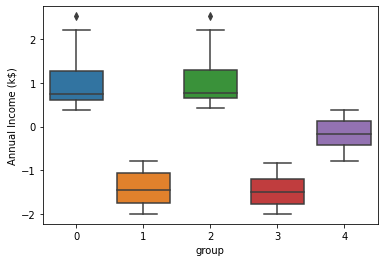

In [28]:
sns.boxplot(x='group',y='Annual Income (k$)',data= h_df)
plt.show()

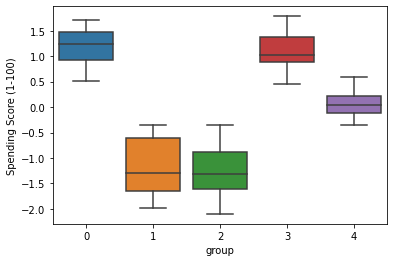

In [29]:
sns.boxplot(x='group',y='Spending Score (1-100)',data=h_df)
plt.show()

* Though we get same number of clusters(5) even from Agglomerative Clustering, but the interpretation of groups might be different from K-Means Clustering.Lets compare these clusters with K-Means. 

   - Here Cluster 0 is similar to Cluster 2 of K-means
   - Cluster 1 is similar to Cluster 3 of K-Means
   - Cluster 2 is similar to Cluster 0 of K-Means
   - Cluster 3 is similar to Cluster 4 of K-Means
   - Cluster 4 is similar to Cluster 1 of K-Means

### Final Conclusion:
    
* Thus we can choose any one method of clustering which suits the best as per the requirement, and further comment on the clusters so formed. Thus the objective of Increasing sales and hence making huge profits, by identifying and targeting the right set of customers could be achieved likewise.